# Task 3: Exploratory Data Analysis - Retail

Exploratory Data Analysis is a process of performing investigation and obtaining as much valuble information about the data as possible. EDA help us to gain critical insights about the business and operations, thus EDA is one of the initial phase of Data Analytics. 

## Data
The Retail Data is a collection of 9994 observations throughout different cities of United States of America. Based on various categories of products the profit can be observed.

## Author : Ujjawal Tanwar

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Data into Notebook

In [6]:
dataset = pd.read_csv("SampleSuperstore.csv")

## Exploring The Data

##### The First Five Observations

In [7]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### Last Five Observations

In [8]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


As we can see the data have total 9994 observations.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##### Missing Values
Let's see if our data have any missing values

In [10]:
dataset.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

It can be observed that in given data no attribute have any missing values.

#### Shape Of Dataset

In [11]:
dataset.shape

(9994, 13)

#### Data Types

In [13]:
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Name of each Column in Data

In [14]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Detecting Duplicate and Removing Them

In [15]:
dataset.duplicated().sum()

17

In [ ]:
dataset.drop_duplicates()

#### Count of Unique Values in Each Coloumn

In [16]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Removing Irrelevant Features
The attribute 'Postal Code' have no impact on the data.

In [19]:
dataset = dataset.drop(['Postal Code'], axis=1)

In [75]:
dataset.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Category Feature
Total count of all three categories: Office Supplies, Furniture, Technology

In [20]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Text(0.5, 0, 'Category')

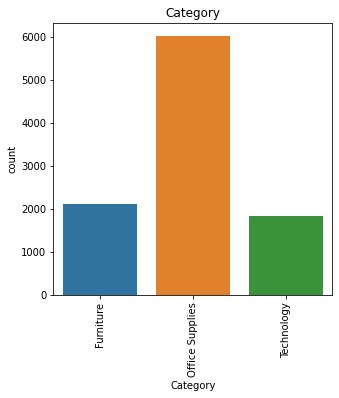

In [21]:
plt.figure(figsize=(5,5))
ax = sns.countplot(dataset['Category'])
plt.xticks(rotation=90)
plt.title('Category')
plt.xlabel('Category')

### Sales And Profit Per Category

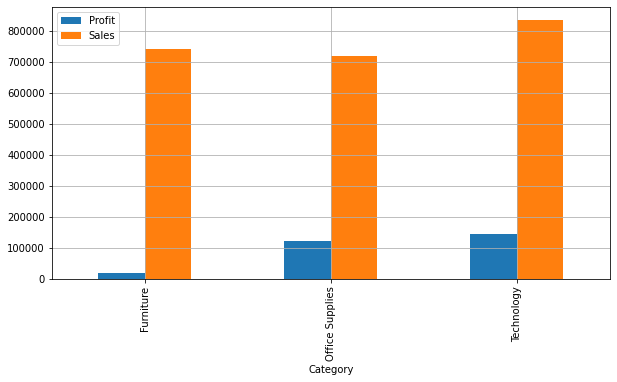

In [22]:
x = dataset.groupby('Category')['Profit', 'Sales'].sum()
x.plot.bar(figsize=(10,5), grid = True)

### Sub-Category Feature
There are total 17 Sub-Category under 3 Main Categories of Product

In [23]:
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0.5, 0, 'Sub-Category')

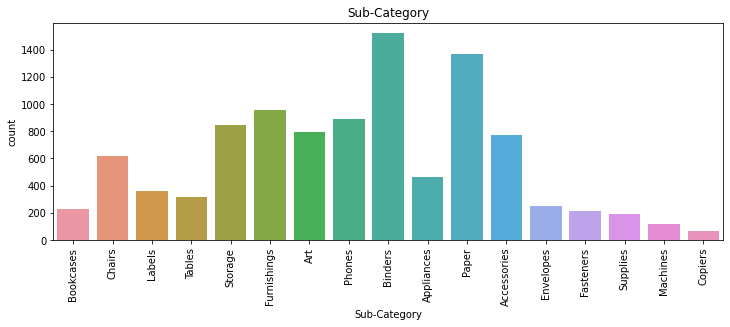

In [24]:
plt.figure(figsize=(12,4))
ax = sns.countplot(dataset['Sub-Category'])
plt.xticks(rotation=90)
plt.title('Sub-Category')
plt.xlabel('Sub-Category')

### Sales And Profit Per Sub-Categoory

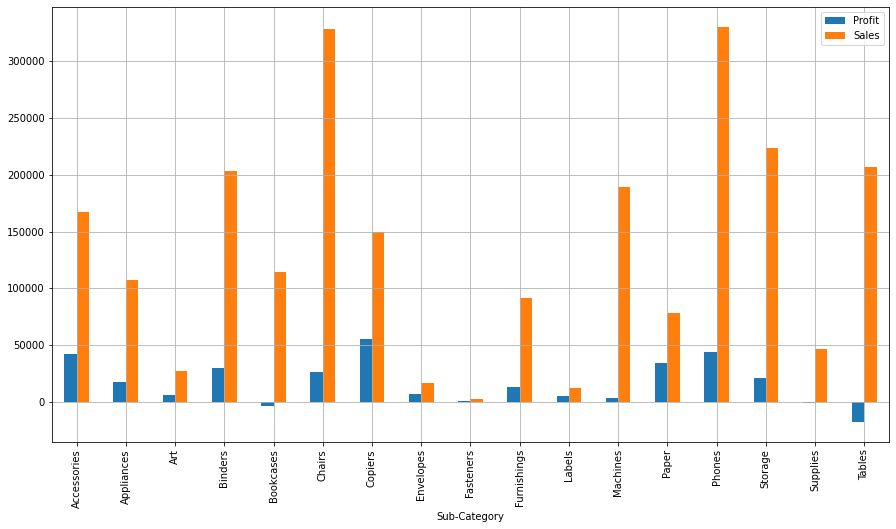

In [25]:
x = dataset.groupby('Sub-Category')['Profit', 'Sales'].sum()
x.plot.bar(figsize=(15,8), grid = True)

### State

#### Count Of Each State

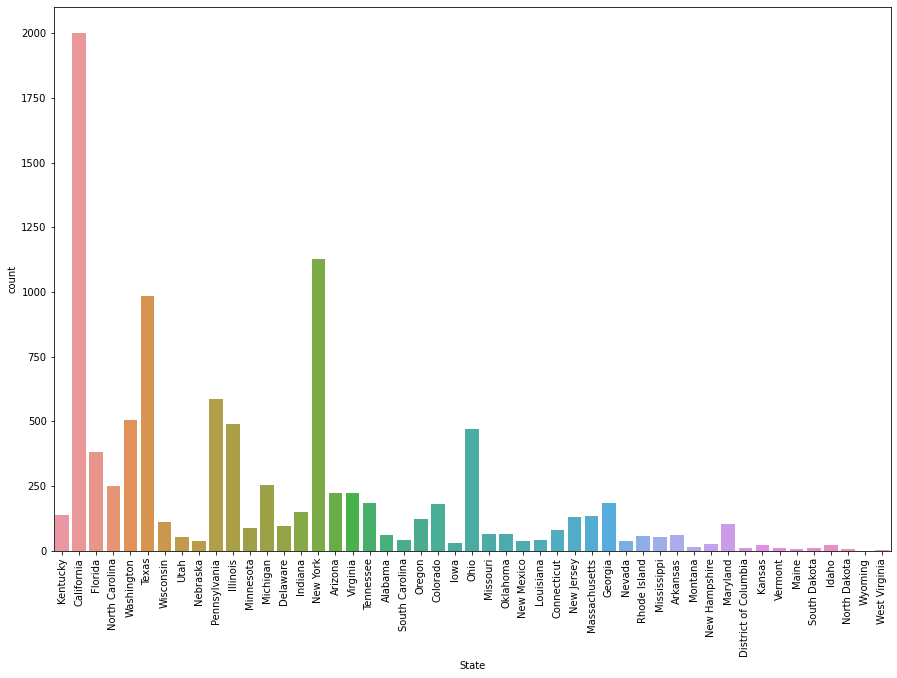

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x=dataset['State'])
plt.xticks(rotation=90)
plt.show()

#### Sales Per State

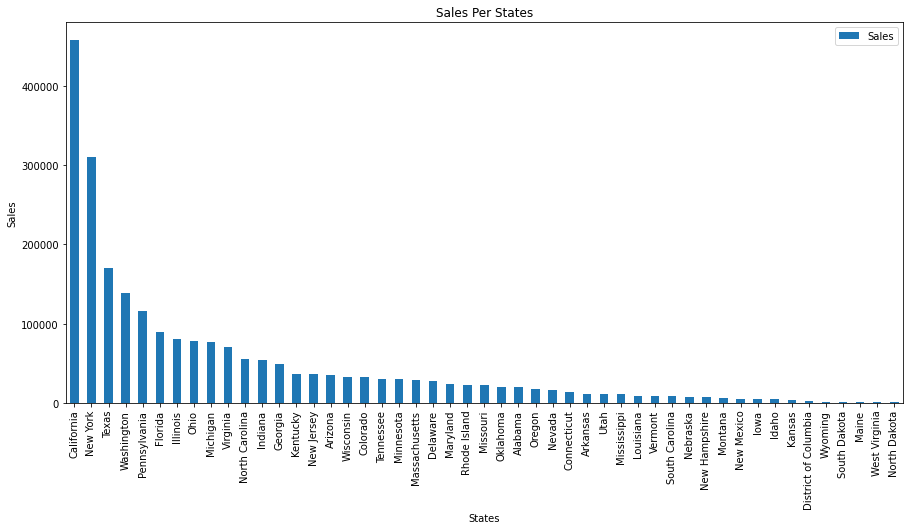

In [65]:
plt.figure(figsize=(15,7))
s = dataset.groupby("State")["Sales"].sum().sort_values(ascending=False)
s.plot.bar()
plt.xticks(rotation=90)
plt.title('Sales Per States')
plt.xlabel('States')
plt.ylabel('Sales')
plt.legend()

#### Sales Estimates Per State

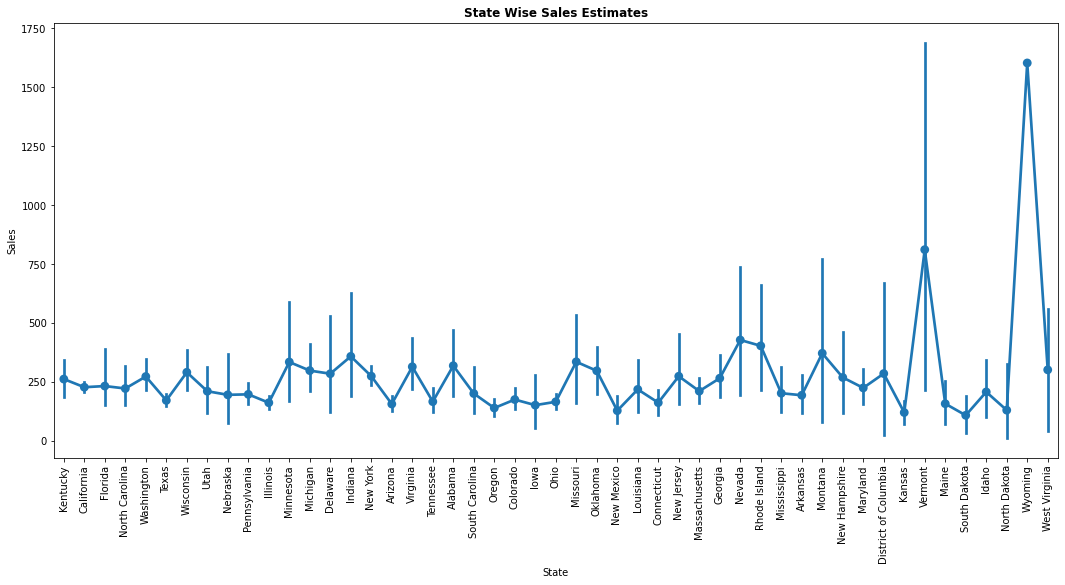

In [80]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dataset["State"], y=dataset["Sales"], data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('State Wise Sales Estimates', weight = 'bold')
plt.show()

### Region

#### Count Of Each Region

Text(0.5, 0, 'Region')

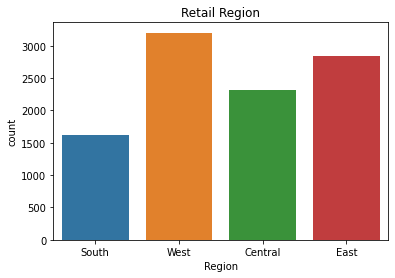

In [29]:
dataset['Region'].value_counts()
x = sns.countplot(dataset['Region'])
plt.title('Retail Region')
plt.xlabel('Region')

#### Region Wise Sales And Profit

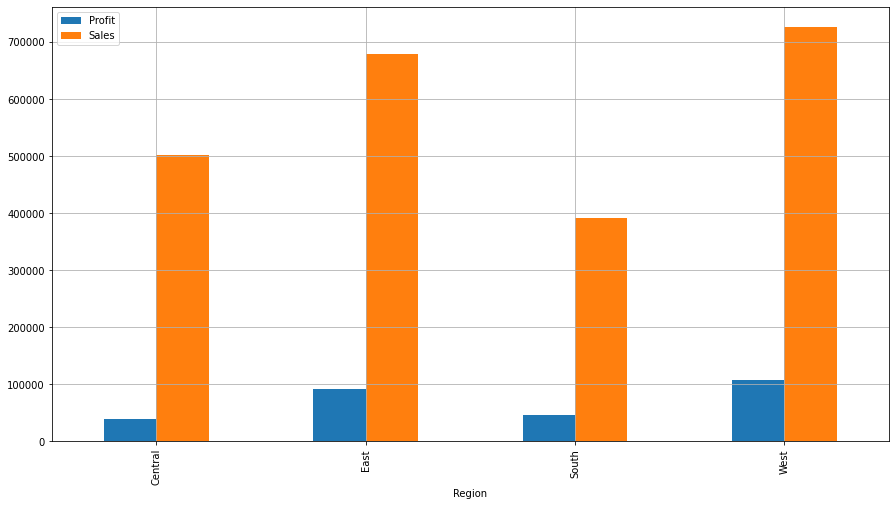

In [59]:
region = dataset.groupby("Region")["Profit", "Sales"].sum()
region.plot.bar(figsize=(15,8), grid=True)

## Profit

### State wise Total Profit

In [62]:
dataset.groupby('State')['Quantity', 'Sales', 'Discount', 'Profit'].sum()

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,256,19510.6400,0.00,5786.8253
Arizona,862,35282.0010,68.00,-3427.9246
Arkansas,240,11678.1300,0.00,4008.6871
California,7667,457687.6315,145.60,76381.3871
Colorado,693,32108.1180,57.60,-6527.8579
Connecticut,281,13384.3570,0.60,3511.4918
Delaware,367,27451.0690,0.60,9977.3748
District of Columbia,40,2865.0200,0.00,1059.5893
Florida,1379,89473.7080,114.65,-3399.3017


### State Wise Mean of Profit

In [63]:
dataset.groupby("State")[["Quantity", "Discount", "Sales", "Profit"]].mean()

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,4.196721,0.000000,319.846557,94.865989
Arizona,3.848214,0.303571,157.508933,-15.303235
Arkansas,4.000000,0.000000,194.635500,66.811452
California,3.831584,0.072764,228.729451,38.171608
Colorado,3.807692,0.316484,176.418231,-35.867351
Connecticut,3.426829,0.007317,163.223866,42.823071
Delaware,3.822917,0.006250,285.948635,103.930988
District of Columbia,4.000000,0.000000,286.502000,105.958930
Florida,3.600522,0.299347,233.612815,-8.875461


### State Wise Statistic of Profit

In [60]:
dataset.groupby("State").Profit.agg(["sum", "mean", "min", "max", "median", "count", "std", "var"])


,sum,mean,min,max,median,count,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,16.87500,61,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,2.53365,224,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,18.34080,60,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,13.30560,2001,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,3.12480,182,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,12.18310,82,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,19.19700,96,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,14.52720,10,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,2.93400,383,126.324165,15957.794770


#### State Wise Estimates of Profit

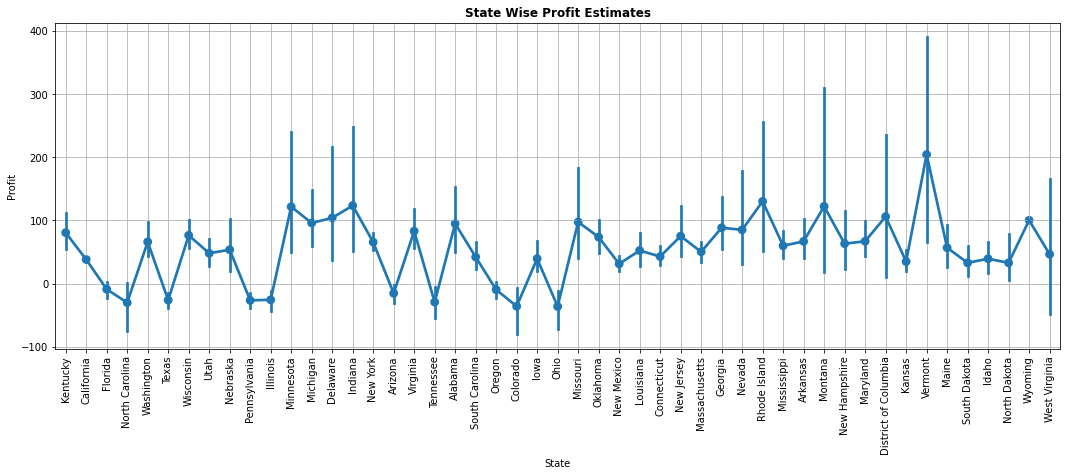

In [76]:
f,ax=plt.subplots(figsize=(18,6))
g = sns.pointplot(x=dataset["State"], y=dataset["Profit"], data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid(True)
plt.title('State Wise Profit Estimates', weight = 'bold')
plt.show()

#### Profit vs Sub-Category

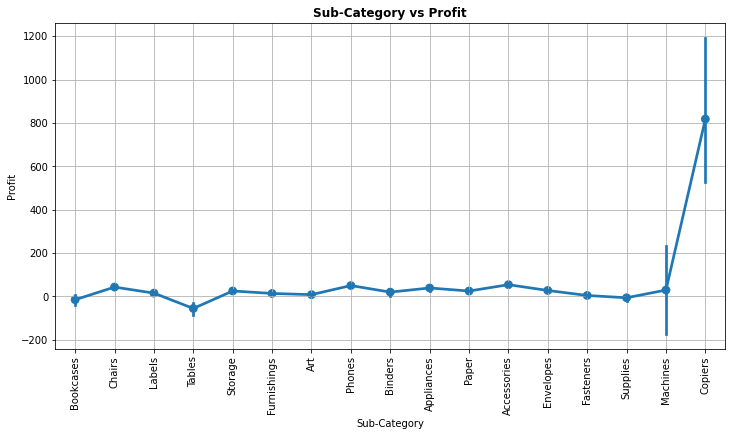

In [68]:
f,ax=plt.subplots(figsize=(12,6))
g = sns.pointplot(x=dataset["Sub-Category"], y=dataset["Profit"], data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid(True)
plt.title('Sub-Category vs Profit', weight = 'bold')
plt.show()

### Distribution of Data

#### As per Segment

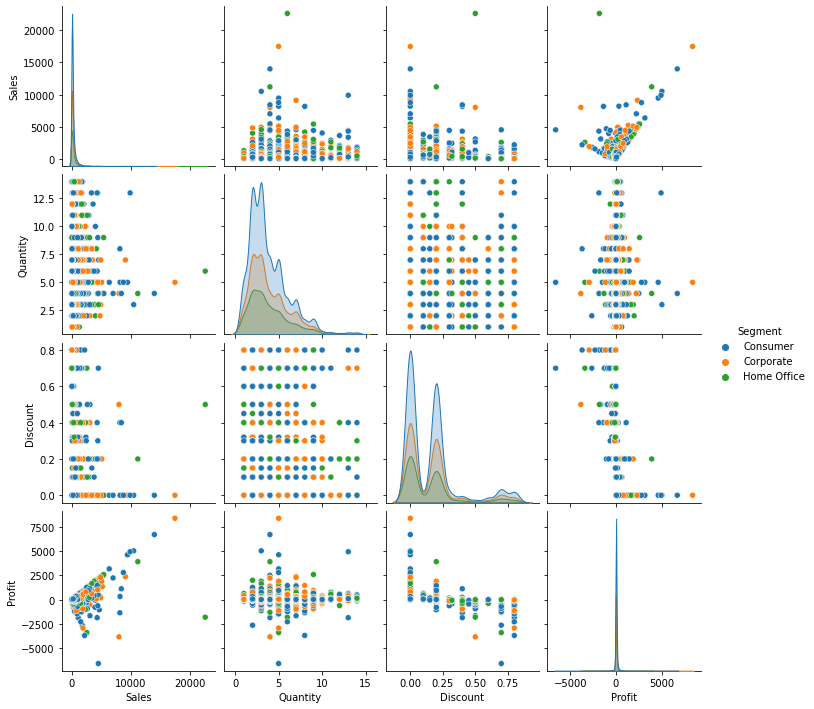

In [73]:
sns.pairplot(dataset, hue='Segment')

#### As Per Region

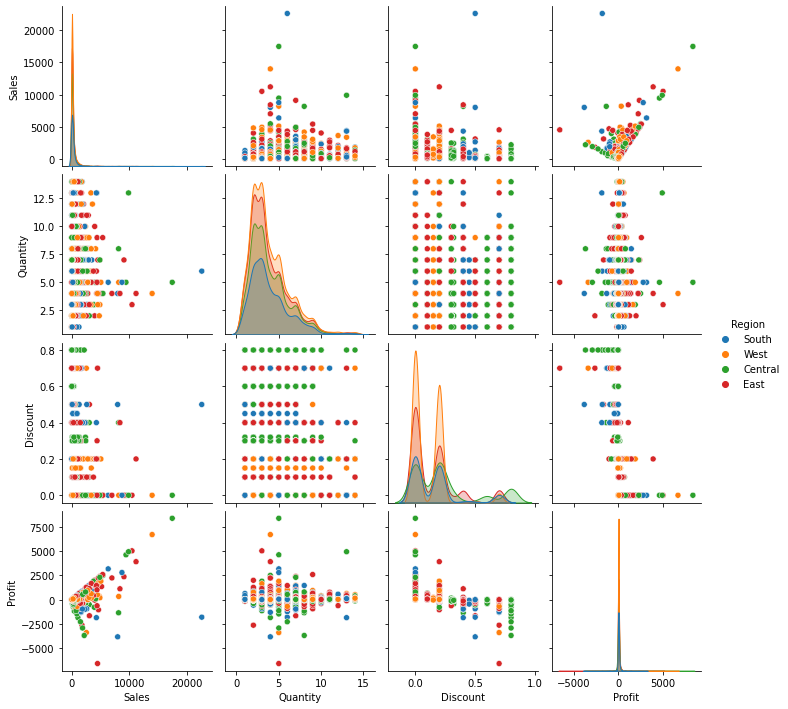

In [71]:
sns.pairplot(dataset, hue='Region')

#### As per Category

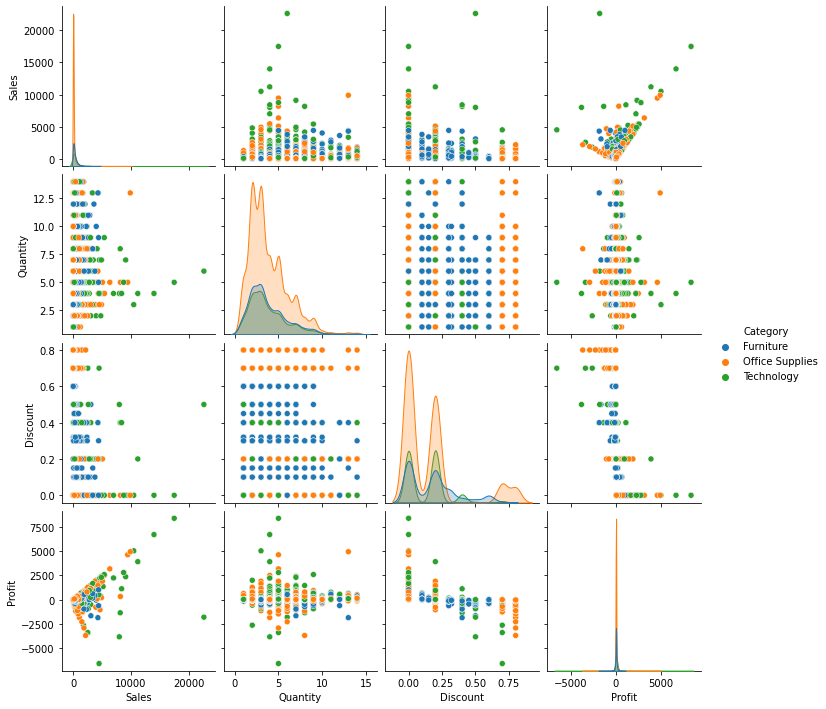

In [74]:
sns.pairplot(dataset, hue='Category')

#### As per Sub-Category

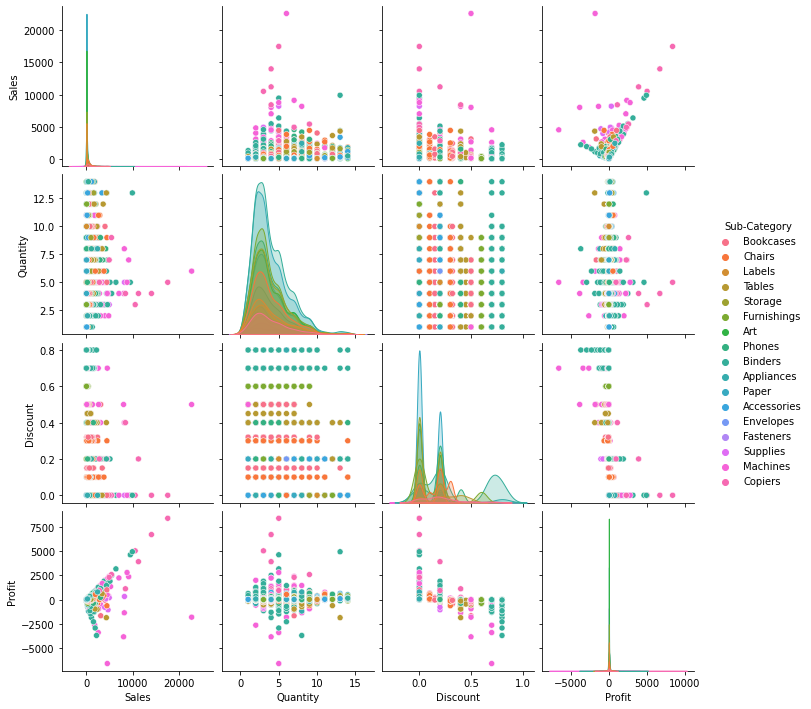

In [70]:
sns.pairplot(dataset, hue='Sub-Category')

**CONCLUSION**
1. Profit and Sales Have High Correlation.
2. No Correlation Between Segment and Profit
3. Sub-Category With Highest Profit is Copiers And Machines